In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv("/content/sample_data/Social_Net_class.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [100]:
df.isna().value_counts()

,,,,count
Gender,Age,EstimatedSalary,Purchased,
False,False,False,False,400


In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,400.0,0.4900,0.500526,0.0,0.00,0.0,1.0,1.0
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0


In [102]:
df = df.drop(columns=["User ID"])

KeyError: "['User ID'] not found in axis"

In [103]:
from sklearn.preprocessing import LabelEncoder


In [50]:
lb = LabelEncoder()


In [104]:
df["Gender"] = lb.fit_transform(df["Gender"])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [ ]:
#train-test-split

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df.iloc[:,:-1]

In [107]:
y = df["Purchased"]

In [108]:
#spliting the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [109]:
#Check training data score without scaling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,accuracy_score,f1_score,classification_report,confusion_matrix

In [110]:
knn =KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_train,y_train)*100

87.1875

In [111]:
knn.score(X_test,y_test)*100

82.5

In [112]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [78]:
knn.score(X_test,y_pred)

1.0

In [113]:
display(y_test,y_pred)

,Purchased
147,0
88,0
223,1
349,0
206,1
...,...
23,1
159,1
65,0
314,0


array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [114]:
print(confusion_matrix(y_test,y_pred))

[[42  1]
 [13 24]]


Text(50.72222222222221, 0.5, 'Actual')

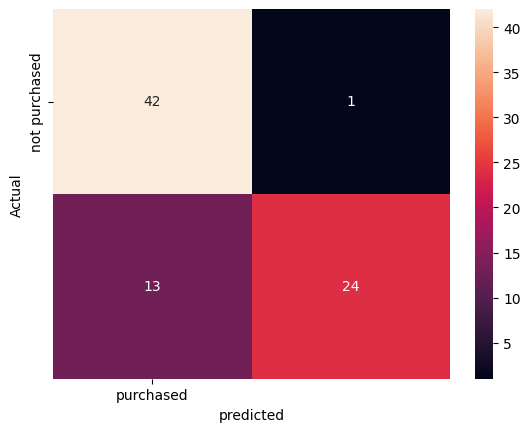

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test,y_pred),annot =True, xticklabels=["purchased"],yticklabels =["not purchased"])
plt.xlabel("predicted")
plt.ylabel("Actual")

In [120]:
#check actual records of class 0
sum(y_test==0)

43

In [122]:
sum(y_test==1)

37

In [123]:
#predicted
sum(y_pred==0)

55

In [124]:
sum(y_pred==1)

25

In [125]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86        43
           1       0.96      0.65      0.77        37

    accuracy                           0.82        80
   macro avg       0.86      0.81      0.82        80
weighted avg       0.85      0.82      0.82        80



In [126]:
print(accuracy_score(y_test,y_pred)*100)

82.5


In [131]:
#find value of k
from sklearn.metrics import precision_score,recall_score,f1_score,r2_score
for i in range (1,11):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print('for k value:',i,'precision is:',precision_score(y_test,y_pred,average='weighted'))


for k value: 1 precision is: 0.8503174603174604
for k value: 2 precision is: 0.786328125
for k value: 3 precision is: 0.8072827635327634
for k value: 4 precision is: 0.815625
for k value: 5 precision is: 0.8544545454545454
for k value: 6 precision is: 0.8679824561403509
for k value: 7 precision is: 0.8167714884696018
for k value: 8 precision is: 0.8004114420062696
for k value: 9 precision is: 0.7696363636363637
for k value: 10 precision is: 0.7886160714285715


In [132]:
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
f1_list=[]  # list for f1_score
k_list=[] # list for K value
for k in range(1,11):
    clf=KNeighborsClassifier(n_neighbors=k,n_jobs=-1)
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred,average='macro')
    f1_list.append(f)
    k_list.append(k)

In [133]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]
print("Optimum K value=",best_k," with F1-Score=",best_f1_score)

Optimum K value= 1  with F1-Score= 0.8484848484848485


Text(0.5, 1.0, 'K neigbours vs f1_score')

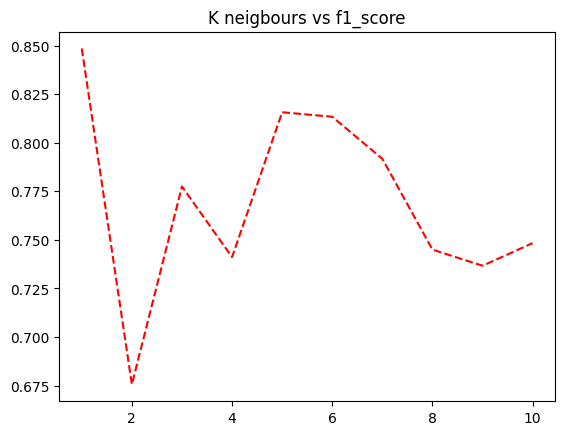

In [134]:
plt.plot(k_list,f1_list,'r--')
plt.title('K neigbours vs f1_score')

In [135]:
from sklearn.neighbors import KNeighborsClassifier
model_2 = KNeighborsClassifier(n_neighbors=20)
model_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [136]:
model_2.score(X_train,y_train)*100

82.8125

In [137]:
#KNN with fature scaling
from sklearn.preprocessing import StandardScaler

In [143]:
st = StandardScaler()
new_X_train= st.fit_transform(X_train)
new_X_test =st.transform(X_test)

In [142]:
new_X_train[:4]

array([[ 1.06458129, -0.69367188,  0.51094478],
       [-0.93933644, -0.88635851, -0.42385503],
       [-0.93933644, -1.84979168,  0.48173228],
       [ 1.06458129,  0.26976129, -0.36543004]])

In [144]:
new_knn = KNeighborsClassifier(n_neighbors=5)
new_knn.fit(new_X_train,y_train)

KNeighborsClassifier()

In [147]:
new_y_pred = new_knn.predict(new_X_test)
new_accuracy =accuracy_score(y_test, new_y_pred)
new_conf_matrix =confusion_matrix(y_test, new_y_pred)
new_accuracy ,new_conf_matrix

(0.925,
 array([[40,  3],
        [ 3, 34]]))

Text(50.722222222222214, 0.5, 'Actual')

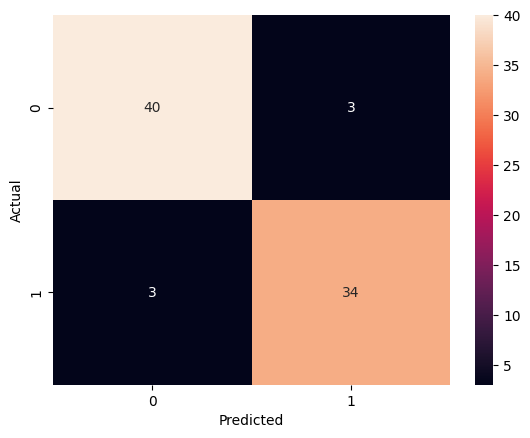

In [149]:
sns.heatmap(confusion_matrix(y_test,new_y_pred),annot=True,)

plt.xlabel('Predicted')

plt.ylabel('Actual')

In [150]:
new_accuracy

0.925

**Conclusion= Accuracy of model without scaling =82.5%
Accuracy of model with scaling =92.5%**